In [151]:
# Package used in this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data processing

## Import data

In [9]:
df_original=pd.read_csv("craigslistVehicles.csv")

In [10]:
df_original.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/aspermont...,"abilene, TX",https://abilene.craigslist.org,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,...,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHl...,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,33.130100,-100.234400
1,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,31999,2012.0,ram,2500,NaN,NaN,diesel,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYP...,www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA...,30.648368,-97.862949
2,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,16990,2003.0,ram,3500,NaN,NaN,diesel,...,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI...,www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMI...,30.648516,-97.862434
3,https://abilene.craigslist.org/cto/d/merkel-20...,"abilene, TX",https://abilene.craigslist.org,6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,...,automatic,NaN,4wd,NaN,pickup,white,https://images.craigslist.org/00M0M_2wKzc7dKLU...,2002 GMC Sierra Extended Cab Truck For Sale! R...,32.444400,-99.992400
4,https://abilene.craigslist.org/cto/d/breckenri...,"abilene, TX",https://abilene.craigslist.org,37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,...,automatic,NaN,4wd,full-size,pickup,silver,https://images.craigslist.org/00r0r_eW1YWlKfCG...,"2012 Chevrolet 3500 178k miles, runs and drive...",32.781689,-98.942248


## Delete columns

First we would like to delete the columns we do not need and the columns with many NaN values.

In [49]:
df_original.isnull().sum()

url                  0
city                 0
city_url             0
price                0
year              1487
manufacturer     26915
make              9677
condition       250074
cylinders       218997
fuel              4741
odometer        110800
title_status      4024
transmission      4055
VIN             239238
drive           165838
size            366256
type            159179
paint_color     180021
image_url           26
desc                30
lat              11790
long             11790
dtype: int64

In [292]:
df=df_original.drop(columns=["url","city_url","VIN","size","paint_color","image_url","desc"])

In [293]:
df.describe()

,price,year,odometer,lat,long
count,5.503130e+05,548826.000000,4.395130e+05,538523.000000,538523.000000
mean,9.398773e+04,2008.709121,1.037676e+05,38.446760,-93.849082
std,1.242762e+07,9.610097,2.126622e+05,5.822595,17.611870
min,0.000000e+00,1900.000000,0.000000e+00,-81.884981,-178.154297
25%,3.790000e+03,2006.000000,5.057600e+04,34.724400,-106.369340
50%,8.988000e+03,2011.000000,9.648300e+04,39.124000,-88.160859
75%,1.750000e+04,2015.000000,1.400480e+05,42.389954,-80.801896
max,3.787877e+09,2020.000000,1.021028e+08,84.151686,122.367000


## Year

In [294]:
df["year"].dtypes

dtype('float64')

Year is currently of float type, we would like to transform it to integers.

In [295]:
df['year']=df['year'].fillna(0.0).astype(int)
df=df.drop(df.index[df['year']<1980])

(array([  1459.,   3322.,   4420.,   7105.,  16771.,  44547.,  96523.,
        110702., 144595., 106357.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <a list of 10 Patch objects>)

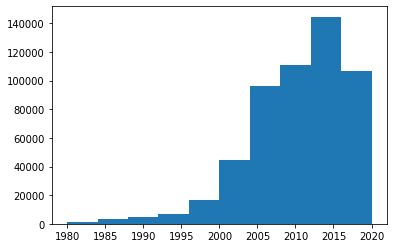

In [296]:
plt.hist(df['year'])

## Price

In [247]:
df["price"].describe()

count    5.358010e+05
mean     9.323802e+04
std      1.247906e+07
min      0.000000e+00
25%      3.700000e+03
50%      8.950000e+03
75%      1.741700e+04
max      3.787877e+09
Name: price, dtype: float64

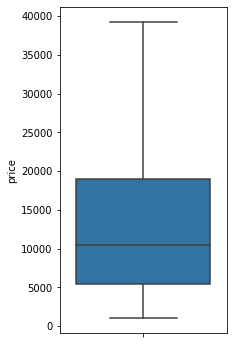

In [297]:
df=df.drop(df.index[df['price']>300000])
df=df.drop(df.index[df['price']<1000])
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df, showfliers=False);

## Odometer

In [249]:
df["odometer"].describe()

count    3.853980e+05
mean     1.067165e+05
std      1.912788e+05
min      0.000000e+00
25%      5.553025e+04
50%      1.000775e+05
75%      1.434902e+05
max      1.021028e+08
Name: odometer, dtype: float64

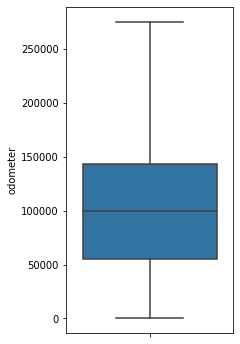

In [250]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=df, showfliers=False);

/Users/yuehan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yuehan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.91883e+05, 1.67631e+05, 2.28490e+04, 1.64400e+03, 3.49000e+02,
        1.58000e+02, 2.06000e+02, 1.33000e+02, 6.00000e+01, 1.15000e+02]),
 array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000., 1000000.]),
 <a list of 10 Patch objects>)

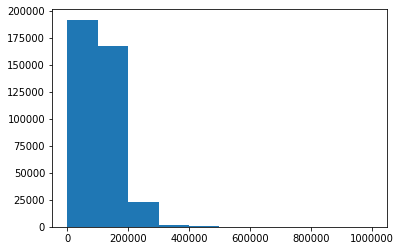

In [298]:
df=df.drop(df.index[df['odometer']>1e06])
plt.hist(df["odometer"])

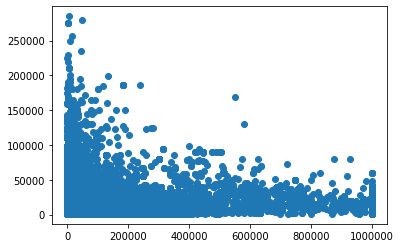

In [172]:
plt.scatter(df['odometer'],df['price'])

## Cylinders

In [252]:
df["cylinders"].dtypes

dtype('O')

In [299]:
df["cylinders"]=df["cylinders"].str.split(" ", n=1, expand = True)[0]
df["cylinders"]=df["cylinders"].str.replace("other","0")
df["cylinders"].fillna(0,inplace=True)
df['cylinders'] = df['cylinders'].astype(int)

## State

In [284]:
df=df_original.drop(columns=["url","city_url","VIN","size","paint_color","image_url","desc"])

In [300]:
df["state"]=df["city"].str.split(", ",n=1,expand=True)[1]

In [301]:
df["state"].isnull().sum()

200746

In [302]:
df["state_1"]=df["city"].str.rsplit(" ", n=1, expand = True)[1]

In [303]:
df["state_1"].unique()

array(['TX', 'GA', 'NY', None, 'IA', 'MD', 'MI', 'NC', 'OH', 'AL', 'CA',
       'rouge', 'arthur', 'WA', 'MN', 'MT', 'ND', 'IN', 'CO', 'KY',
       'islands', 'louisiana', 'michigan', 'urbana', 'SC', 'WV', 'VA',
       'TN', 'portales', 'city', 'valley', 'beach', 'springfield', 'IL',
       'texas', 'pass', 'superior', 'CT', 'kentucky', 'montana',
       'panhandle', 'shore', 'idaho', 'oregon', 'WI', 'NV', 'PA', 'AK',
       'moorhead', 'NM', 'AR', 'sedona', 'shoals', 'keys', 'FL',
       'country', 'forks', 'NE', 'biloxi', 'MS', 'florida', 'lenoir',
       'rockies', 'head', 'LA', 'county', 'decatur', 'MO', 'peninsula',
       'hood', 'OR', 'lafayette', 'ozarks', 'co', 'KS', 'OK', 'clarkston',
       'findlay', 'rock', 'UT', 'robins', 'edinburg', 'bay', 'anderson',
       'orleans', 'dakota', 'SD', 'mississippi', 'midland', 'walton',
       'coast', 'banks', 'AZ', 'orem', 'moscow', 'IA/IL', 'carlsbad',
       'obispo', 'barbara', 'taos', 'hinesville', 'wilkes-barre', 'SJI',
       'mi

In [304]:
state_dict=pd.read_csv("State_abbr.csv")
state_dict.State=state_dict.State.str.lower()
df=df.merge(state_dict,left_on='state_1',right_on='State',how="left")
combine_state = lambda s1, s2: s1 if s1 !=None else s2
df["state"]=df["state"].combine(df["Abbreviation"],combine_state)
df.drop(columns=['state_1','State','Abbreviation'])

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,lat,long,state
0,"abilene, TX",9000,2009,chevrolet,suburban lt2,good,8,gas,217743.0,clean,automatic,rwd,SUV,33.130100,-100.234400,TX
1,"abilene, TX",31999,2012,ram,2500,NaN,0,diesel,NaN,clean,automatic,NaN,NaN,30.648368,-97.862949,TX
2,"abilene, TX",16990,2003,ram,3500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.648516,-97.862434,TX
3,"abilene, TX",6000,2002,gmc,sierra 1500,good,8,gas,195000.0,clean,automatic,4wd,pickup,32.444400,-99.992400,TX
4,"abilene, TX",37000,2012,chevrolet,3500,excellent,8,diesel,178000.0,clean,automatic,4wd,pickup,32.781689,-98.942248,TX
5,"abilene, TX",3700,2003,NaN,F150,fair,8,gas,269000.0,clean,automatic,4wd,pickup,32.579641,-99.663505,TX
6,"abilene, TX",19950,2013,ford,f-250,NaN,8,gas,116792.0,clean,automatic,4wd,pickup,32.736030,-97.133644,TX
7,"abilene, TX",19999,2006,ram,2500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.647777,-97.862434,TX
8,"abilene, TX",33950,2015,ford,f-350,NaN,8,diesel,77350.0,clean,automatic,4wd,pickup,32.754000,-97.134800,TX
9,"abilene, TX",25950,2015,ford,f-350,NaN,8,gas,121030.0,clean,automatic,4wd,truck,32.736030,-97.133644,TX


In [305]:
df["state"].isnull().sum()

184951

In [307]:
df.to_csv("clean_data.csv")